In [2]:
pip install pandas matplotlib


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('Sample_Data.csv')

In [5]:
print(df.head())
print(df.columns)


   Values            Timestamp
0     100  26-06-2024 06:17:55
1     100  26-06-2024 06:18:11
2     100  26-06-2024 06:18:28
3     100  26-06-2024 06:18:45
4     100  26-06-2024 06:19:00
Index(['Values', 'Timestamp'], dtype='object')


In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


/tmp/ipython-input-1298568565.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [7]:
df['MA_1000'] = df['Values'].rolling(window=1000).mean()


In [8]:
df['MA_5000'] = df['Values'].rolling(window=5000).mean()


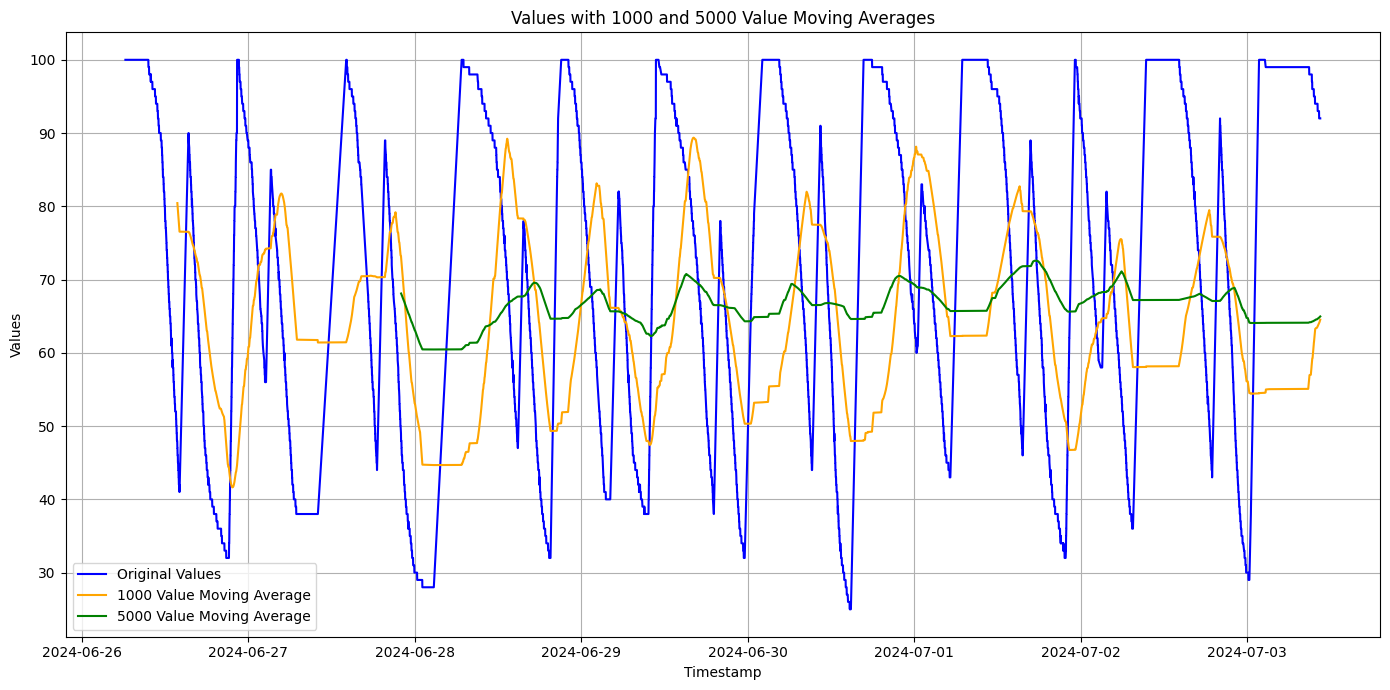

In [9]:
plt.figure(figsize=(14, 7))

plt.plot(df['Timestamp'], df['Values'],
         label='Original Values',
         color='blue')

plt.plot(df['Timestamp'], df['MA_1000'],
         label='1000 Value Moving Average',
         color='orange')

plt.plot(df['Timestamp'], df['MA_5000'],
         label='5000 Value Moving Average',
         color='green')

plt.title('Values with 1000 and 5000 Value Moving Averages')
plt.xlabel('Timestamp')
plt.ylabel('Values')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
df['MA_5'] = df['Values'].rolling(window=5).mean()


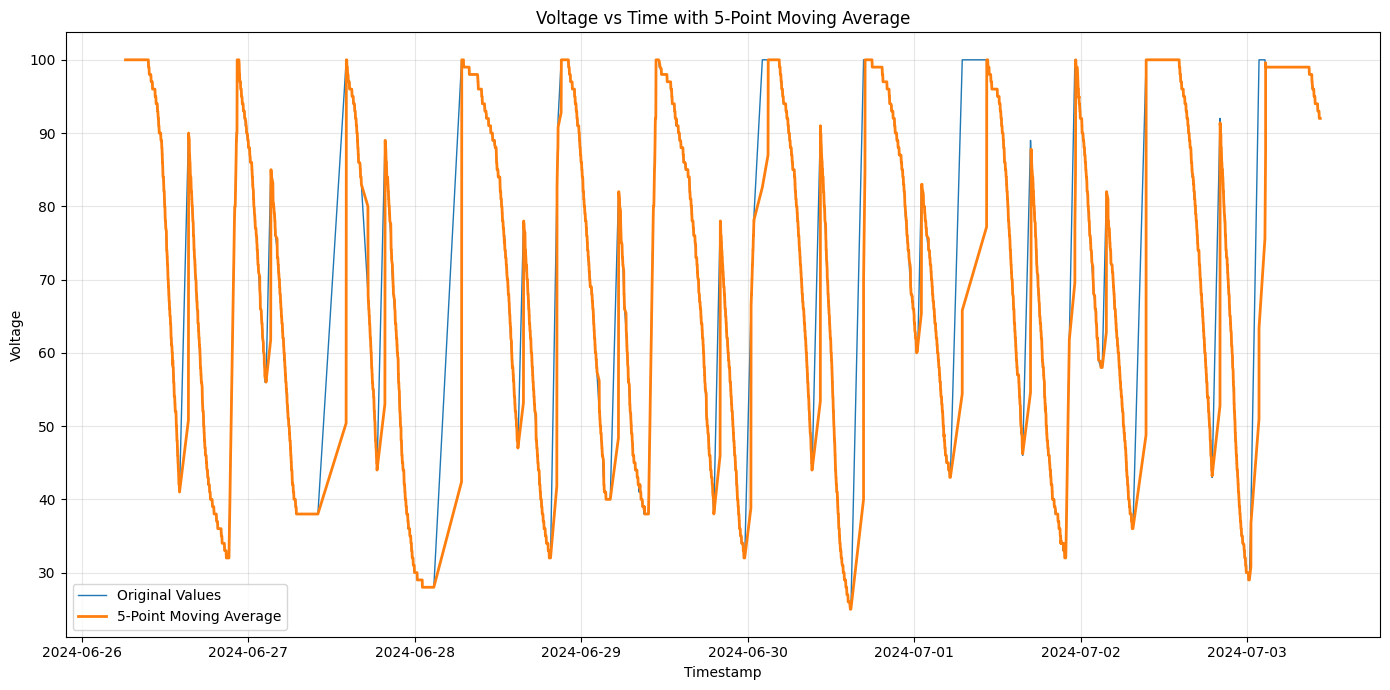

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.plot(df['Timestamp'], df['Values'], label='Original Values', linewidth=1)
plt.plot(df['Timestamp'], df['MA_5'], label='5-Point Moving Average', linewidth=2)

plt.xlabel("Timestamp")
plt.ylabel("Voltage")
plt.title("Voltage vs Time with 5-Point Moving Average")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [12]:
peaks = []
lows = []

for i in range(1, len(df) - 1):
    prev_val = df['Values'].iloc[i - 1]
    curr_val = df['Values'].iloc[i]
    next_val = df['Values'].iloc[i + 1]

    if curr_val > prev_val and curr_val > next_val:
        peaks.append((df['Timestamp'].iloc[i], curr_val))

    if curr_val < prev_val and curr_val < next_val:
        lows.append((df['Timestamp'].iloc[i], curr_val))


In [13]:
peaks_df = pd.DataFrame(peaks, columns=['Timestamp', 'Peak Value'])
lows_df = pd.DataFrame(lows, columns=['Timestamp', 'Low Value'])

print("Peaks:")
print(peaks_df.head())

print("\nLows:")
print(lows_df.head())


Peaks:
            Timestamp  Peak Value
0 2024-06-26 11:49:49          83
1 2024-06-26 12:01:22          79
2 2024-06-26 12:55:48          62
3 2024-06-27 00:33:37          85
4 2024-06-27 03:54:40          77

Lows:
            Timestamp  Low Value
0 2024-06-26 09:57:38         97
1 2024-06-26 10:58:56         92
2 2024-06-26 11:49:32         82
3 2024-06-26 12:01:06         78
4 2024-06-26 18:14:03         42


In [14]:
low_voltage_df = df[df['Values'] < 20]

print("Voltage below 20:")
print(low_voltage_df)


Voltage below 20:
Empty DataFrame
Columns: [Values, Timestamp, MA_1000, MA_5000, MA_5]
Index: []


In [16]:
df['diff1'] = df['Values'].diff()
df['diff2'] = df['diff1'].diff()

downward_acceleration = df[(df['diff1'] < 0) & (df['diff2'] < 0)]

print("Downward acceleration points:")
print(downward_acceleration[['Timestamp', 'Values']])


Downward acceleration points:
                Timestamp  Values
36    2024-06-26 09:36:30      99
60    2024-06-26 09:42:33      98
120   2024-06-26 09:57:38      97
125   2024-06-26 09:58:47      97
174   2024-06-26 10:11:06      96
...                   ...     ...
21687 2024-07-03 09:21:12      96
21732 2024-07-03 09:34:56      95
21769 2024-07-03 09:44:50      94
21831 2024-07-03 10:07:38      93
21877 2024-07-03 10:20:17      92

[1187 rows x 2 columns]


In [17]:
peaks_df.to_csv("peaks.csv", index=False)
lows_df.to_csv("lows.csv", index=False)
low_voltage_df.to_csv("below_20.csv", index=False)
downward_acceleration.to_csv("downward_acceleration.csv", index=False)
